In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [6]:
df = sns.load_dataset('titanic')

In [7]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [8]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


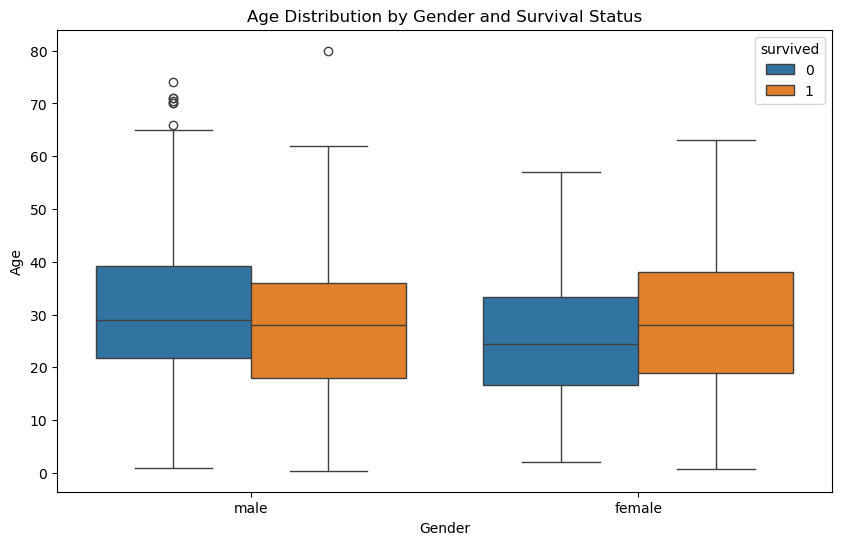

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='sex', y='age', hue='survived', data=df)

# Add labels and title
plt.title('Age Distribution by Gender and Survival Status')
plt.xlabel('Gender')
plt.ylabel('Age')

# Display the plot
plt.show()

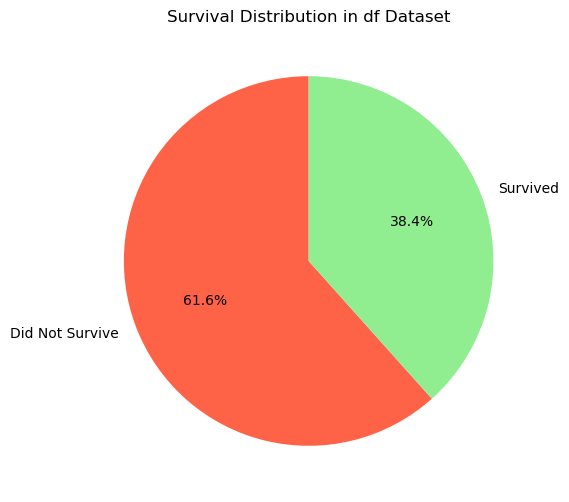

In [12]:
# Check for missing values in the 'survived' column
df_cleaned = df.dropna(subset=['survived'])

# Count the number of survivors (1 = survived, 0 = did not survive)
survival_counts = df_cleaned['survived'].value_counts()

# Plot the Pie Chart
plt.figure(figsize=(6,6))
plt.pie(survival_counts, labels=['Did Not Survive', 'Survived'], autopct='%1.1f%%', colors=['#FF6347', '#90EE90'], startangle=90)

# Add a title
plt.title('Survival Distribution in df Dataset')

# Display the pie chart
plt.show()

Outliers:
      age   sex  survived
33   66.0  male         0
54   65.0  male         0
96   71.0  male         0
116  70.5  male         0
280  65.0  male         0
456  65.0  male         0
493  71.0  male         0
630  80.0  male         1
672  70.0  male         0
745  70.0  male         0
851  74.0  male         0


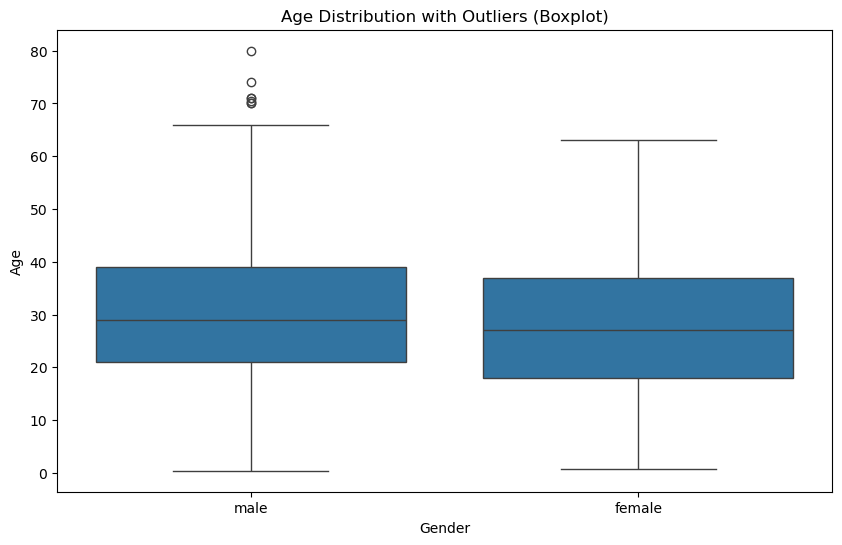

In [16]:
# Drop rows with missing 'age' values
df_cleaned = df.dropna(subset=['age'])

# Calculate the IQR for the 'age' column
Q1 = df_cleaned['age'].quantile(0.25)  # 25th percentile
Q3 = df_cleaned['age'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df_cleaned[(df_cleaned['age'] < lower_bound) | (df_cleaned['age'] > upper_bound)]

# Print out the outliers
print("Outliers:")
print(outliers[['age', 'sex', 'survived']])

# Plot the boxplot to visually show outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', data=df_cleaned)

# Add labels and title
plt.title('Age Distribution with Outliers (Boxplot)')
plt.xlabel('Gender')
plt.ylabel('Age')

# Display the plot
plt.show()